In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo xlsx diretamente do computador - OrganizationType_Count_dia_semajus - esse arquivo ainda não foi transformado para agrupamento mensal
uploaded = files.upload()

# Lê o arquivo xlsx usando Pandas
df = pd.read_excel(list(uploaded.keys())[0])

Saving OrganizationType_Count_dia_semajust.xlsx to OrganizationType_Count_dia_semajust.xlsx


In [ ]:
soma_total = df["Total Geral"].sum()
print(f"Soma da coluna 'Total Geral': {soma_total}")

print("\nColunas do dataframe:")
print(df.columns)


Soma da coluna 'Total Geral': 40142

Colunas do dataframe:
Index(['Date Breach', 'BSF', 'BSO', 'BSR', 'EDU', 'GOV', 'MED', 'NGO', 'UNKN',
       'Total Geral'],
      dtype='object')


In [ ]:
# Função para ajustar datas incompletas (ano ou ano/mês) e tratá-las como datas válidas
def ajustar_datas(data_str):
    try:
        if len(data_str) == 4:  # Somente ano (ex: '2005') → assume '01-01'
            return pd.Timestamp(data_str + '-01-01')
            #return pd.NaT  # Considera inválido por não conter mês e dia
        elif len(data_str) == 7:  # Ano e mês (ex: '2005-09') → assume dia '01'
            return pd.Timestamp(data_str + '-01')
        else:  # Data completa (ex: '2005-09-22')
            return pd.Timestamp(data_str)
    except:
        return pd.NaT  # Retorna valor nulo se a conversão falhar

# Aplica a função de ajuste à coluna de datas
df['Date Breach'] = df['Date Breach'].apply(ajustar_datas)

# Converte a coluna para o tipo datetime do Pandas
df.loc[:, 'Date Breach'] = pd.to_datetime(df['Date Breach'])

# Define a coluna de data como índice do DataFrame
df.set_index('Date Breach', inplace=True)

# Garante que o índice está em formato datetime (reforço de segurança)
df.index = pd.to_datetime(df.index)

# Extrai a série temporal do setor atual, com frequência mensal
serie = df.resample('ME').sum().fillna(0)

# Verifica se o DataFrame 'serie' está vazio antes de realizar a amostragem
if serie.empty:
    print("O DataFrame 'serie' está vazio. Não é possível realizar a amostragem.")
else:
    # Mostra 10 linhas aleatórias do DataFrame se não estiver vazio
    print(serie.sample(10))

              BSF   BSO   BSR   EDU   GOV   MED   NGO   UNKN  Total Geral
Date Breach                                                              
2013-07-31   15.0  11.0  20.0   4.0   4.0  11.0   0.0   16.0           81
2016-04-30   22.0  51.0  44.0  17.0   3.0  39.0  17.0  130.0          323
2022-07-31   38.0  74.0  10.0  44.0  12.0  61.0  18.0   97.0          354
1999-09-30    0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0            1
2018-07-31   36.0  38.0  43.0   7.0   7.0  47.0   0.0   78.0          256
2002-11-30    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0            0
1995-03-31    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0            0
2001-12-31    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0            0
1991-09-30    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0            0
2001-06-30    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0            0


In [ ]:
soma_total = serie["Total Geral"].sum()
print(f"Soma da coluna 'Total Geral': {soma_total}")

Soma da coluna 'Total Geral': 40142


🔢 Violações totais por setor:
UNKN    11328.0
BSO      7364.0
MED      7145.0
BSF      4421.0
BSR      3923.0
EDU      2496.0
NGO      1284.0
GOV      1033.0
dtype: float64


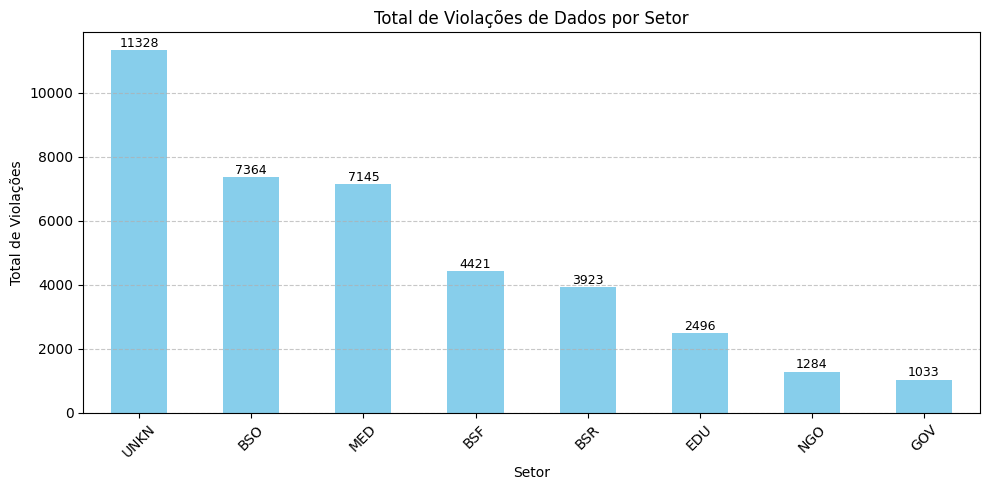

<ipython-input-7-7af490003ba6>:30: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_ano = df.resample('Y').sum()  # 'Y' agrupa por ano


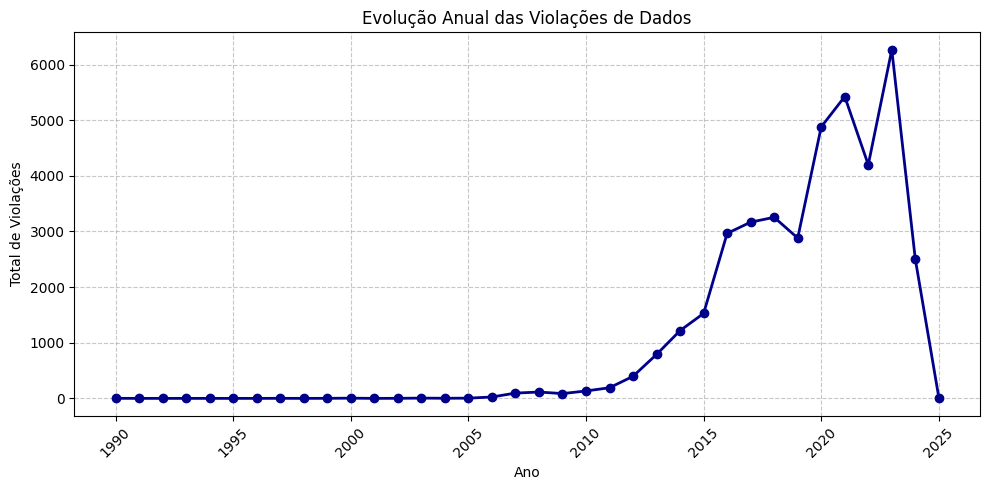

<ipython-input-7-7af490003ba6>:46: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_ano_setor = df[setores[:-1]].resample('Y').sum()  # Exclui 'Total Geral'


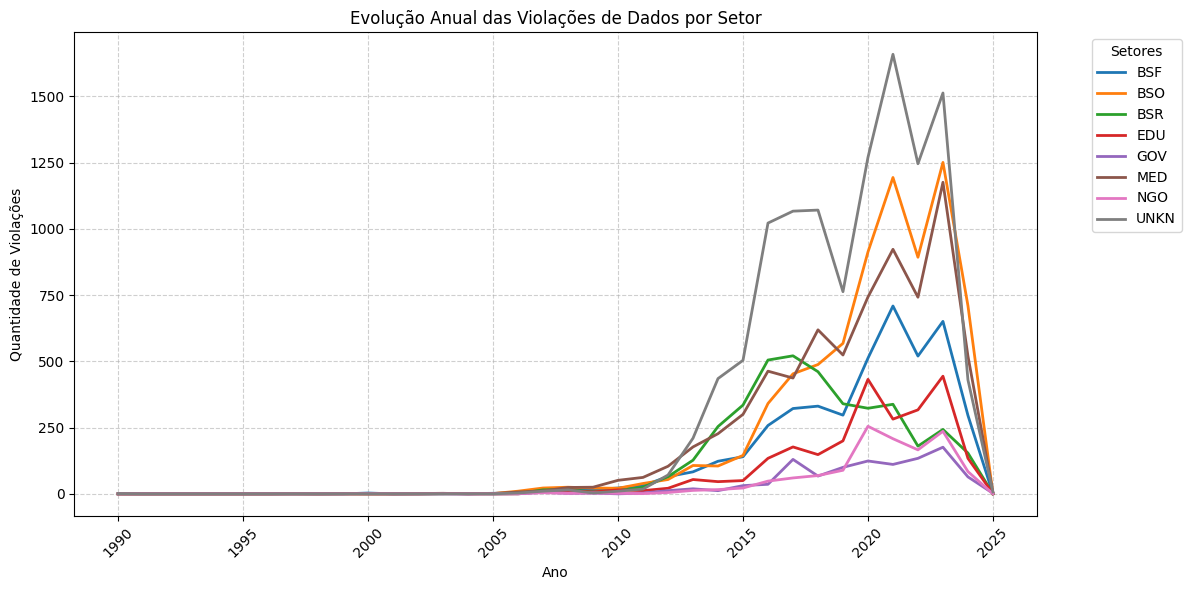

In [ ]:
# Lista de colunas que representam os setores
setores = ['BSF', 'BSO', 'BSR', 'EDU', 'GOV', 'MED', 'NGO', 'UNKN', 'Total Geral']

# ============================
# Gráfico de barras por setor
# ============================
setores_soma = df[setores[:-1]].sum().sort_values(ascending=False)  # Exclui 'Total Geral'

print("🔢 Violações totais por setor:")
print(setores_soma)

plt.figure(figsize=(10, 5))
ax1 = setores_soma.plot(kind='bar', color='skyblue')
plt.title('Total de Violações de Dados por Setor')
plt.xlabel('Setor')
plt.ylabel('Total de Violações')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rótulos
for i, valor in enumerate(setores_soma):
    plt.text(i, valor + 5, f'{int(valor)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ================================
# Gráfico de linha por ano (Total)
# ================================
df_ano = df.resample('Y').sum()  # 'Y' agrupa por ano
violacoes_anuais = df_ano['Total Geral']

plt.figure(figsize=(10, 5))
plt.plot(violacoes_anuais.index.year, violacoes_anuais.values, marker='o', color='darkblue', linewidth=2)
plt.title('Evolução Anual das Violações de Dados')
plt.xlabel('Ano')
plt.ylabel('Total de Violações')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================
# Gráfico de linhas: Violações por setor/ano
# ============================================
df_ano_setor = df[setores[:-1]].resample('Y').sum()  # Exclui 'Total Geral'

plt.figure(figsize=(12, 6))
for setor in df_ano_setor.columns:
    plt.plot(df_ano_setor.index.year, df_ano_setor[setor], label=setor, linewidth=2)

plt.title('Evolução Anual das Violações de Dados por Setor')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Violações')
plt.legend(title='Setores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-8-a96f41df015f>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_ano = df.resample('Y').sum()


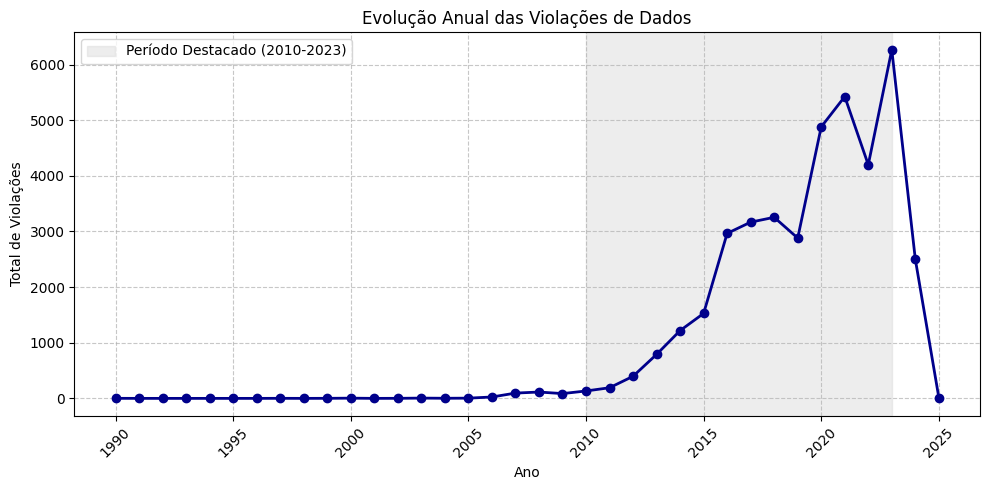

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por ano
df_ano = df.resample('Y').sum()
violacoes_anuais = df_ano['Total Geral']

# Criar a figura
plt.figure(figsize=(10, 5))

# Plotar a linha principal
plt.plot(violacoes_anuais.index.year, violacoes_anuais.values, marker='o', color='darkblue', linewidth=2)

# Destacar o período de 2010 a 2023
plt.axvspan(2010, 2023, color='lightgray', alpha=0.4, label='Período Destacado (2010-2023)')

# Adicionar título e legendas
plt.title('Evolução Anual das Violações de Dados')
plt.xlabel('Ano')
plt.ylabel('Total de Violações')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()
